In [1]:
import numpy as np
import matplotlib.pylab as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
%matplotlib inline

In [2]:
#List of temperatures as floats and strings
temp1 = [  290., 292.5, 295., 297.5, 300., 302.5, 305., 307.5, 310.]
stemp1 = ["290", "292.5", "295", "297.5", "300", "302.5", "305", "307.5", "310"]

t = len(temp1)

In [29]:
#Load data
day = 86400.

rh = np.load( "../data/small_domain_micro_RH.dat") 
rho = np.load( "../data/small_domain_micro_rho.dat")
qpsrc = np.load( "../data/small_domain_micro_qpsrc.dat")  / day / 1000.
eff_w = np.load( "../data/small_domain_micro_eff_w.dat") #average droplet fall speed
qp = np.load( "../data/small_domain_micro_qp.dat")
z = np.load( "../data/small_domain_micro_z.dat") 

In [30]:
import math
#Have to account for where there is no cloud
for j in range( 3 ):
    for i in range( t  ):
        for k in range( 64 ):
            if math.isnan(eff_w[j, i, k]) == True:
                eff_w[j, i, k] = 0.
            if math.isinf(eff_w[j, i, k]) == True:
                eff_w[j, i, k] = 0.
qp = np.ma.masked_where( qp < 0., qp)

height = np.mean( qpsrc * z, axis = 2 ) / np.mean( qpsrc, axis = 2 ) #Effective formation height
nrh = np.mean( rh * qp, axis = 2) / np.mean( qp, axis = 2) #effective relative humidity
mean_eff_w = np.mean( eff_w * qp, axis = 2) / np.mean( qp, axis = 2 ) #effective fall speed
time = height / mean_eff_w #Effective fall time

In [31]:
def make_axis( a ):

    a.tick_params( axis = 'x', which = 'both', bottom="on", top = "off", labelbottom = "on", direction = 'out')                  
    a.tick_params( axis = 'y', which = 'both', bottom="off", top="off",  labelbottom="off", left="on", right="off", labelleft="on", direction = 'out')                                                                                        

    a.tick_params(length = 5, which = 'both')

    a.spines["top"].set_visible(False)    
    a.spines["right"].set_visible(False) 

    return a

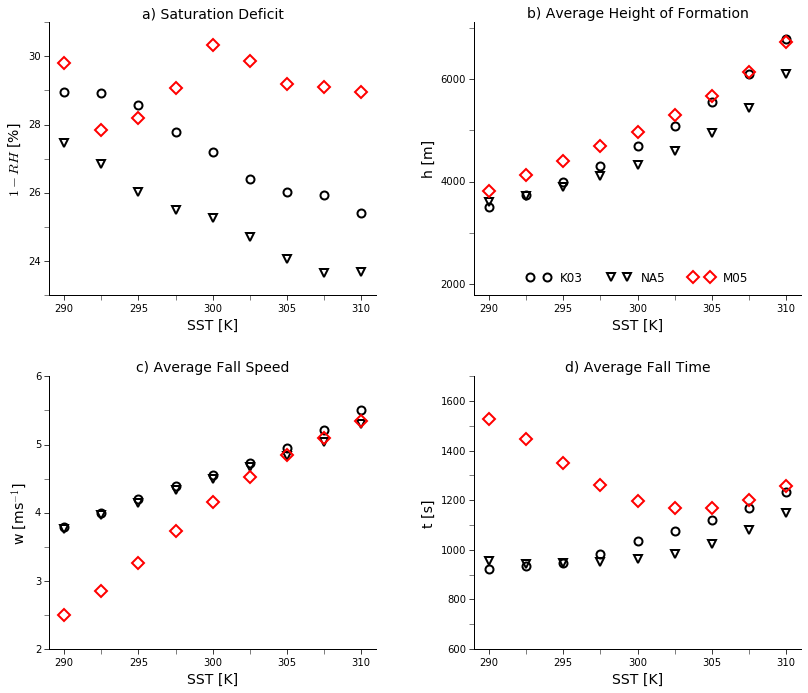

In [32]:
#Plot!
fig = plt.figure( figsize = (12, 10) )
plt.subplots_adjust(left = 0.08, right = 0.95, bottom = 0.1, top = 0.97, hspace = 0.3, wspace = 0.3)

ax = plt.subplot(2, 2, 1)
plt.title( "a) Saturation Deficit", fontsize = 14 )

plt.plot( temp1[:], (1. - nrh[0]) * 100., 'o', markerfacecolor = 'None', markeredgecolor = 'k', markeredgewidth = 2., markersize = 8)
plt.plot( temp1[:], (1. - nrh[1]) * 100., 'v', markerfacecolor = 'None', markersize = 8, markeredgecolor = 'k', markeredgewidth = 2. )
plt.plot( temp1[:], (1. - nrh[2]) * 100., 'D', markerfacecolor = 'None', markersize = 8, markeredgecolor = 'r', markeredgewidth = 2. )


make_axis( ax )

plt.ylabel("$1 - RH$ [%]", fontsize = 14)

majorLocator = MultipleLocator(2.)
minorLocator = MultipleLocator(1)
ax.yaxis.set_major_locator(majorLocator)
ax.yaxis.set_minor_locator(minorLocator)

majorLocator = MultipleLocator(5)
minorLocator = MultipleLocator(2.5)
ax.xaxis.set_major_locator(majorLocator)
ax.xaxis.set_minor_locator(minorLocator)

plt.xlim([289., 311.])
plt.xlabel( "SST [K]", fontsize = 14 )
    
ax = plt.subplot(2, 2, 2)
plt.title( "b) Average Height of Formation", fontsize = 14 )

plt.plot( temp1[:], height[0] , 'o', markerfacecolor = 'None', markeredgecolor = 'k', markeredgewidth = 2., markersize = 8)
plt.plot( temp1[:], height[1], 'v', markerfacecolor = 'None', markersize = 8, markeredgecolor = 'k', markeredgewidth = 2. )
plt.plot( temp1[:], height[2], 'D', markerfacecolor = 'None', markersize = 8, markeredgecolor = 'r', markeredgewidth = 2. )

plt.legend(["K03", "NA5", "M05"], frameon = False, loc = "lower center", ncol = 3 )

plt.ylabel("h [m]", fontsize = 14)

make_axis( ax )

plt.ylim([1800., 7100.])

majorLocator = MultipleLocator(2000.)
minorLocator = MultipleLocator(1000.)
ax.yaxis.set_major_locator(majorLocator)
ax.yaxis.set_minor_locator(minorLocator)

majorLocator = MultipleLocator(5)
minorLocator = MultipleLocator(2.5)
ax.xaxis.set_major_locator(majorLocator)
ax.xaxis.set_minor_locator(minorLocator)

plt.xlim([289., 311.])
plt.xlabel( "SST [K]", fontsize = 14 )

ax = plt.subplot(2, 2, 3)
plt.title( "c) Average Fall Speed", fontsize = 14 )

plt.plot( temp1[:], mean_eff_w[0], 'o', markerfacecolor = 'None', markeredgecolor = 'k', markeredgewidth = 2., markersize = 8)
plt.plot( temp1[:], mean_eff_w[1], 'v', markerfacecolor = 'None', markersize = 8, markeredgecolor = 'k', markeredgewidth = 2. )
plt.plot( temp1[:], mean_eff_w[2], 'D', markerfacecolor = 'None', markersize = 8, markeredgecolor = 'r', markeredgewidth = 2. )

make_axis( ax )

plt.ylabel("w [ms$^{-1}$]", fontsize = 14)


plt.ylim([2., 6.])

majorLocator = MultipleLocator(1.)
minorLocator = MultipleLocator(.5)
ax.yaxis.set_major_locator(majorLocator)
ax.yaxis.set_minor_locator(minorLocator)

majorLocator = MultipleLocator(5)
minorLocator = MultipleLocator(2.5)
ax.xaxis.set_major_locator(majorLocator)
ax.xaxis.set_minor_locator(minorLocator)

plt.xlim([289., 311.])
plt.xlabel( "SST [K]", fontsize = 14 )

ax = plt.subplot(2, 2, 4)
plt.title( "d) Average Fall Time", fontsize = 14 )

plt.plot( temp1[:], height[0] / mean_eff_w[0], 'o', markerfacecolor = 'None', markeredgecolor = 'k', markeredgewidth = 2., markersize = 8)
plt.plot( temp1[:], height[1] / mean_eff_w[1], 'v', markerfacecolor = 'None', markersize = 8, markeredgecolor = 'k', markeredgewidth = 2. )
plt.plot( temp1[:], height[2] / mean_eff_w[2], 'D', markerfacecolor = 'None', markersize = 8, markeredgecolor = 'r', markeredgewidth = 2. )


make_axis( ax )

plt.ylabel("t [s]", fontsize = 14)


plt.ylim([600., 1700.])

majorLocator = MultipleLocator(200.)
minorLocator = MultipleLocator(100.)
ax.yaxis.set_major_locator(majorLocator)
ax.yaxis.set_minor_locator(minorLocator)

majorLocator = MultipleLocator(5)
minorLocator = MultipleLocator(2.5)
ax.xaxis.set_major_locator(majorLocator)
ax.xaxis.set_minor_locator(minorLocator)

plt.xlim([289., 311.])
plt.xlabel( "SST [K]", fontsize = 14 )

plt.show()


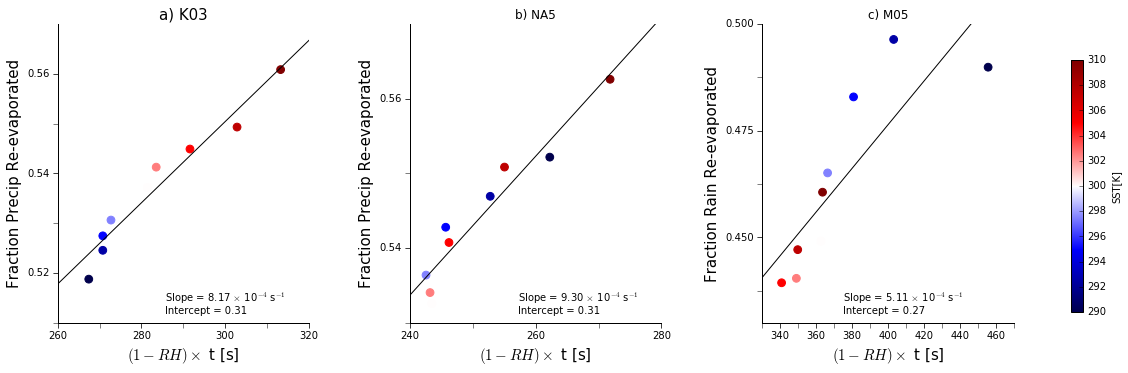

In [49]:
#Now plot scaling
import scipy.stats as ss
def lin_regression(var1, var2):
    """
    Regresses var1 onto var2
    Returns: slope, intercept, r_value, p_value, std_err
    """
    #print "Linear regression"
    return ss.linregress(var1, var2)

alphas = np.load( "data/small_domain_micro_comp_alphas.dat") #The conversion efficiencies
beta = 1. - np.load( "data/small_domain_micro_comp_betas.dat") #The re-evaporation efficiencies

fig = plt.figure( figsize = (16, 5) )
plt.subplots_adjust(left = 0.07, right = 0.97, bottom = 0.12, top = 0.95, hspace = 0.4, wspace = 0.4)


ax = plt.subplot(1, 3, 1)
plt.title("a) K03", fontsize = 15)

plt.scatter( (1. - nrh[0]) * time[0], beta[0], c = temp1, s = 60, cmap = plt.cm.coolwarm, edgecolors = 'face' )

sl, inter, r = lin_regression( (1. - nrh[0]) * time[0], beta[0] )[:3]
x = np.linspace(0., 350., 10)
plt.plot( x, inter + sl * x, 'k' )

sl *= 10. ** 4
plt.text( 260 + 6 / 14. * 60., 0.51 + 1. / 14. * 0.06, r"Slope = %1.2f $\times$ 10$^{-4}$ s$^{-1}$" % sl )
plt.text( 260 + 6 / 14. * 60., 0.51 + 1./14 * .06 * 2. / 5., r"Intercept = %1.2f" % inter )

make_axis( ax )
plt.ylim([0.51, .57])
plt.ylabel("Fraction Precip Re-evaporated", fontsize = 15)
plt.xlim([260., 320.])
plt.xlabel("$(1 - RH) \\times$ t [s]", fontsize = 15)


majorLocator = MultipleLocator(.02)
minorLocator = MultipleLocator(.01)
ax.yaxis.set_major_locator(majorLocator)
ax.yaxis.set_minor_locator(minorLocator)
majorLocator = MultipleLocator(20.)
minorLocator = MultipleLocator(10.)
ax.xaxis.set_major_locator(majorLocator)
ax.xaxis.set_minor_locator(minorLocator)

ax = plt.subplot(1, 3, 2)
plt.title("b) NA5")

plt.scatter( (1. - nrh[1]) * time[1], beta[1], c = temp1, s = 60, cmap = plt.cm.coolwarm, edgecolors = 'face' )
sl, inter, r = lin_regression( (1. - nrh[1]) * time[1], beta[1] )[:3]
x = np.linspace(0., 350., 10)
plt.plot( x, inter + sl * x, 'k' )

sl *= 10. ** 4
plt.text( 240 + 6 / 14. * 40., 0.53 + 1. / 14. * 0.04, r"Slope = %1.2f $\times$ 10$^{-4}$ s$^{-1}$" % sl )
plt.text( 240 + 6 / 14. * 40., 0.53 + 1./14 * .04 * 2. / 5., r"Intercept = %1.2f" % inter )

make_axis( ax )
plt.ylim([0.53, .57])
plt.ylabel("Fraction Precip Re-evaporated", fontsize = 15)
plt.xlim([240., 280.])
plt.xlabel("$(1 - RH) \\times$ t [s]", fontsize = 15)

majorLocator = MultipleLocator(.02)
minorLocator = MultipleLocator(.01)
ax.yaxis.set_major_locator(majorLocator)
ax.yaxis.set_minor_locator(minorLocator)
majorLocator = MultipleLocator(20.)
minorLocator = MultipleLocator(10.)
ax.xaxis.set_major_locator(majorLocator)
ax.xaxis.set_minor_locator(minorLocator)

ax = plt.subplot(1, 3, 3)
plt.title("c) M05")

cset = plt.scatter( (1. - nrh[2]) * time[2], beta[2], c = temp1, s = 60, cmap = plt.cm.coolwarm, edgecolors = 'face' )
sl, inter, r = lin_regression( (1. - nrh[2]) * time[2], beta[2] )[:3]
x = np.linspace(0., 550., 10)
plt.plot( x, inter + sl * x, 'k' )

sl *= 10. ** 4
plt.text( 375, 0.435, r"Slope = %1.2f $\times$ 10$^{-4}$ s$^{-1}$" % sl )
plt.text( 375, 0.432, r"Intercept = %1.2f" % inter )

make_axis( ax )
plt.ylim([0.43, .5])
plt.ylabel("Fraction Rain Re-evaporated", fontsize = 15)
plt.xlim([330., 470.])
plt.xlabel("$(1 - RH) \\times$ t [s]", fontsize = 15)

majorLocator = MultipleLocator(.025)
minorLocator = MultipleLocator(.0125)
ax.yaxis.set_major_locator(majorLocator)
ax.yaxis.set_minor_locator(minorLocator)
majorLocator = MultipleLocator(20.)
minorLocator = MultipleLocator(10.)
ax.xaxis.set_major_locator(majorLocator)
ax.xaxis.set_minor_locator(minorLocator)

fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.95, 0.15, 0.01, 0.7])
cbar = fig.colorbar(cset, cax=cbar_ax)
cbar.set_label( "SST[K]" )

plt.show()